### 연습문제 1
- 아래 E-Commerce Shipping Data의 train set을 참조하여 고객이 주문한 물품의 정시 도착 여부를 예측하시오
-  ID와 예측치는 csv 파일로 저장하시오 (EC_result.csv)

- RandomForest를 포함하여, 최소 2개 이상의 모델을 만드세요
- 계층별 교차 검증 결과 (Stratified K-Fold Cross Validation)를 산출하세요
- 추가로, 특성 중요도를 관찰해보세요
- EC_result.csv 파일의 양식은 ID, predicted 컬럼을 갖습니다.

In [1]:
import os
import pandas as pd

path = r'D:\elice_python\GAS_5\pytest_python'

os.chdir(path)

In [2]:
X_train = pd.read_csv('EC_X_train.csv', header=0)
y_train = pd.read_csv('EC_y_train.csv', header=0)
print(X_train.head(1))
print()
print(y_train.head(1))

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               B             Ship                    3                4   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  134                3               high      F   

   Discount_offered  Weight_in_gms  
0                 6           5680  

   ID  Reached.on.Time_Y.N
0   1                    0


In [3]:
X_train.shape, y_train.shape

((8799, 11), (8799, 2))

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8799 non-null   int64 
 1   Warehouse_block      8799 non-null   object
 2   Mode_of_Shipment     8799 non-null   object
 3   Customer_care_calls  8799 non-null   int64 
 4   Customer_rating      8799 non-null   int64 
 5   Cost_of_the_Product  8799 non-null   int64 
 6   Prior_purchases      8799 non-null   int64 
 7   Product_importance   8799 non-null   object
 8   Gender               8799 non-null   object
 9   Discount_offered     8799 non-null   int64 
 10  Weight_in_gms        8799 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 756.3+ KB


In [5]:
for column in X_train.columns:
    print(column, X_train[column].unique(), ' ', sep='\n')



ID
[   1    2    3 ... 8797 8798 8799]
 
Warehouse_block
['B' 'F' 'C' 'A' 'D']
 
Mode_of_Shipment
['Ship' 'Flight' 'Road']
 
Customer_care_calls
[3 4 2 6 5 7]
 
Customer_rating
[4 3 1 5 2]
 
Cost_of_the_Product
[134 173 192 284 246 211 238 178 198 214 234 146 194 241 260 162 205 240
 275 151 181 140 152 157 167 248 249 203 201 243 287 256 190 141 145 135
 164 227 274 286 144 222 158 161 250 245 125 252 189 269 231 233 191 257
 268 217 163 225 172 133 263 150 199 143 220 216 116 175 208 267 228 242
 213 149 202 255 166 244 277 223 295 180 302 171 254 253 276 184 219 307
 264 305 271 170 258 159 236 204 265 174 239 187 188 259 272 197 210 229
 261 266 221 195 142 212 296 137 182 148 209 237 176 185 139 156 154 155
 153 224 132 262 281 270 136 169 104 111 102 207 301 165 283 160 183 226
 127 285 291 273 280 292 251 179 230 108 279 118 218  98 177 129 138 289
 293 247 200 306 186 193 232 235 278 308 123 110 168 215 196 310 282 128
 120 206 119 115 106 103 303 147 117 288 105 304 309 131 13

In [6]:
X_train_id = X_train[['ID']]
X_train_id.head(1)

,ID
0,1


In [7]:
X_train_num = X_train[[
    'Customer_care_calls',
    'Customer_rating', 
    'Cost_of_the_Product',
    'Prior_purchases',
    'Discount_offered',
    'Weight_in_gms'
    ]]
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer_care_calls  8799 non-null   int64
 1   Customer_rating      8799 non-null   int64
 2   Cost_of_the_Product  8799 non-null   int64
 3   Prior_purchases      8799 non-null   int64
 4   Discount_offered     8799 non-null   int64
 5   Weight_in_gms        8799 non-null   int64
dtypes: int64(6)
memory usage: 412.6 KB


In [ ]:
import matplotlib.pyplot as plt

for c in X_train_num.columns:
    X_train_num[[c]].boxplot()
    plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)

In [10]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
print(X_train_num_scaled.shape)
X_train_num_scaled.head(1)

(8799, 6)


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0.2,0.75,0.17757,0.125,0.078125,0.683565


In [11]:
X_train_cat = X_train[[
    'Warehouse_block',
    'Mode_of_Shipment',
    'Product_importance',
    'Gender'
]]
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Warehouse_block     8799 non-null   object
 1   Mode_of_Shipment    8799 non-null   object
 2   Product_importance  8799 non-null   object
 3   Gender              8799 non-null   object
dtypes: object(4)
memory usage: 275.1+ KB


In [12]:
X_train_hot = pd.get_dummies(X_train_cat)
print(X_train_hot.shape)
X_train_hot.head(1)

(8799, 13)


,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,False,True,False,False,False,False,False,True,True,False,False,True,False


In [13]:
X_train_pp = pd.concat((X_train_id, X_train_num_scaled, X_train_hot), axis=1)
print(X_train_pp.shape)


(8799, 20)


In [14]:
X_train_pp.head(1), y_train.head(1)

(   ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
 0   1                  0.2             0.75              0.17757   
 
    Prior_purchases  Discount_offered  Weight_in_gms  Warehouse_block_A  \
 0            0.125          0.078125       0.683565              False   
 
    Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
 0               True              False              False              False   
 
    Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  \
 0                    False                  False                   True   
 
    Product_importance_high  Product_importance_low  Product_importance_medium  \
 0                     True                   False                      False   
 
    Gender_F  Gender_M  
 0      True     False  ,
    ID  Reached.on.Time_Y.N
 0   1                    0)

In [15]:
X = X_train_pp.iloc[:,1:]
y = y_train.iloc[:,1]
X.shape, y.shape

((8799, 19), (8799,))

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=5)
skf.split(X=X, y=y)


<generator object _BaseKFold.split at 0x00000211CD4C0F90>

In [24]:
import numpy as np

arange = np.concatenate((
    np.arange(0.1, 1, 0.5),
    np.arange(1, 10, 5),
    np.arange(10, 100, 50)
))

param_grid = {
    'rfc' : {'n_estimators' : [10,20,30,40]},
    'svc' : {'C' : arange, 'gamma' : arange}
}

In [25]:
for name, model in [
    ('rfc',RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42))
    ]: 
    gsc = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=skf)
    gsc.fit(X,y)
    print(name)
    print(gsc.best_estimator_)
    print(gsc.best_params_)
    print(gsc.best_score_)

rfc
RandomForestClassifier(n_estimators=20, random_state=42)
{'n_estimators': 20}
0.6630285802883871
svc
SVC(C=0.6, gamma=0.1, random_state=42)
{'C': 0.6, 'gamma': 0.1}
0.6573487001912244


In [27]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y)

c:\Users\Caelu\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [28]:
qda.score(X,y)

0.6251846800772816

In [34]:
rfc = RandomForestClassifier(random_state=42, n_estimators=25)
rfc.fit(X,y)
rfc.score(X,y)

0.9988635072167291

In [35]:
X_test = pd.read_csv('EC_X_test.csv', header=0)

In [36]:
X_test_id = X_test[['ID']]
print(X_test_id.head(1))
X_test_num = X_test[[
    'Customer_care_calls',
    'Customer_rating', 
    'Cost_of_the_Product',
    'Prior_purchases',
    'Discount_offered',
    'Weight_in_gms'
    ]]
X_test_num.info()

     ID
0  8800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer_care_calls  2200 non-null   int64
 1   Customer_rating      2200 non-null   int64
 2   Cost_of_the_Product  2200 non-null   int64
 3   Prior_purchases      2200 non-null   int64
 4   Discount_offered     2200 non-null   int64
 5   Weight_in_gms        2200 non-null   int64
dtypes: int64(6)
memory usage: 103.2 KB


In [37]:
X_test_num_scaled = scaler.transform(X_test_num)

In [38]:
X_test_cat = X_test[[
    'Warehouse_block',
    'Mode_of_Shipment',
    'Product_importance',
    'Gender'
]]
print(X_test_cat.info())
X_test_hot = pd.get_dummies(X_test_cat)
print(X_train_hot.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Warehouse_block     2200 non-null   object
 1   Mode_of_Shipment    2200 non-null   object
 2   Product_importance  2200 non-null   object
 3   Gender              2200 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB
None
(8799, 13)


In [47]:
X_test_num_scaled= pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)

X_te = pd.concat([X_test_num_scaled, X_test_hot], axis=1)

In [48]:
X_te.shape

(2200, 19)

In [49]:
y_te = pd.read_csv('EC_result.csv')
y_te = y_te.iloc[:,-1]

In [50]:
rfc.score(X_te, y_te)

0.7627272727272727

In [51]:
svc = SVC(C=0.6, gamma=0.1, random_state=42).fit(X,y)
svc.score(X_te, y_te)

0.7836363636363637

In [56]:
sorted_importances = np.argsort(rfc.feature_importances_)[::-1]
sorted_importances

array([ 5,  4,  2,  3,  1,  0, 10, 16, 15, 13, 18,  7,  8, 11, 17,  9, 12,
        6, 14], dtype=int64)

In [57]:
features_ranking = [(i, X_te.columns[i], rfc.feature_importances_[i]) for i in sorted_importances]
print(*features_ranking, sep='\n')

(5, 'Weight_in_gms', 0.25953173011158465)
(4, 'Discount_offered', 0.23254734858022877)
(2, 'Cost_of_the_Product', 0.16871551080413003)
(3, 'Prior_purchases', 0.06755971439604243)
(1, 'Customer_rating', 0.061779437932311755)
(0, 'Customer_care_calls', 0.05618552878225768)
(10, 'Warehouse_block_F', 0.015704149863890442)
(16, 'Product_importance_medium', 0.01367858289056217)
(15, 'Product_importance_low', 0.012699371420001722)
(13, 'Mode_of_Shipment_Ship', 0.012670124017851316)
(18, 'Gender_M', 0.012582522083635332)
(7, 'Warehouse_block_B', 0.01211110116147354)
(8, 'Warehouse_block_C', 0.012031553336316319)
(11, 'Mode_of_Shipment_Flight', 0.011441055934752833)
(17, 'Gender_F', 0.011426558028475212)
(9, 'Warehouse_block_D', 0.011367377873915804)
(12, 'Mode_of_Shipment_Road', 0.011349601451180705)
(6, 'Warehouse_block_A', 0.010144371884244949)
(14, 'Product_importance_high', 0.006474359447144193)


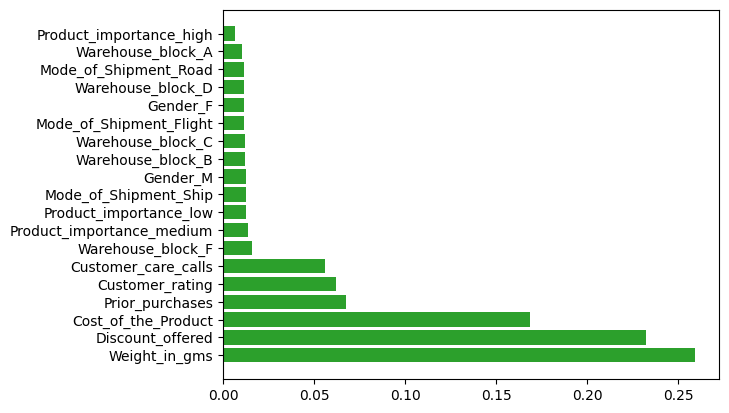

In [62]:
import matplotlib.pyplot as plt
var = list(zip(*features_ranking))
plt.barh(range(len(features_ranking)), var[2], align='center')
plt.yticks(range(len(features_ranking)), var[1])
           
plt.show()

### 연습문제 2
- 아래 데이터셋의 여행객 정보를 기반으로 여행보험 상품 가입 여부를 예측하시오
- (train 데이터의 TravelInsurance 컬럼이 상품 가입 여부이며, 독립변수로 되어 있는 test
데이터로 예측)
- ID와 예측치를 csv 파일로 저장하시오 (Travel_result.csv)

In [1]:
import os
import pandas as pd

path = r'D:\elice_python\GAS_5\pytest_python'

os.chdir(path)

In [2]:
train = pd.read_csv(os.path.join(path,'TravelInsurancePrediction_train.csv'))
test = pd.read_csv(os.path.join(path, 'TravelInsurancePrediction_test.csv'))

train.shape, test.shape

((1501, 10), (486, 9))

In [3]:
train.head(1)

,ID,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   1501 non-null   int64 
 1   Age                  1501 non-null   int64 
 2   Employment Type      1501 non-null   object
 3   GraduateOrNot        1501 non-null   object
 4   AnnualIncome         1501 non-null   int64 
 5   FamilyMembers        1501 non-null   int64 
 6   ChronicDiseases      1501 non-null   int64 
 7   FrequentFlyer        1501 non-null   object
 8   EverTravelledAbroad  1501 non-null   object
 9   TravelInsurance      1501 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 117.4+ KB


In [5]:
for col in test.columns[1:]:
    print(col, train[col].dtype)
    print(train[col].unique())
    print(test[col].unique())
    print()

Age int64
[31 34 28 25 33 26 32 29 35 30 27]
[28 29 34 27 25 26 32 31 30 33 35]

Employment Type object
['Government Sector' 'Private Sector/Self Employed']
['Private Sector/Self Employed' 'Government Sector']

GraduateOrNot object
['Yes' 'No']
['Yes' 'No']

AnnualIncome int64
[ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
[ 800000  750000  500000  850000 1150000 1700000 1300000 1450000 1000000
  350000 1400000 1250000  300000  600000 1350000  400000 1200000  550000
 1750000  650000 1100000 1500000  450000  700000  900000 1050000 1800000
  950000 1550000]

FamilyMembers int64
[6 7 4 3 8 9 5 2]
[4 6 2 5 3 8 7 9]

ChronicDiseases int64
[1 0]
[0 1]

FrequentFlyer object
['No' 'Yes']
['No' 'Yes']

EverTravelledAbroad object
['No' 'Yes']
['No' 'Yes']



In [6]:
train['ChronicDiseases'] = train['ChronicDiseases'].astype(str)
test['ChronicDiseases'] = test['ChronicDiseases'].astype(str)


In [7]:
train.head(1)

,ID,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0


In [8]:
X_tr = train.iloc[:,:-1]
y_tr = train.iloc[:,-1]
X_tr.shape, y_tr.shape

((1501, 9), (1501,))

In [9]:
X_tr_cat = X_tr.select_dtypes('object')
X_tr_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employment Type      1501 non-null   object
 1   GraduateOrNot        1501 non-null   object
 2   ChronicDiseases      1501 non-null   object
 3   FrequentFlyer        1501 non-null   object
 4   EverTravelledAbroad  1501 non-null   object
dtypes: object(5)
memory usage: 58.8+ KB


In [10]:
X_tr_num = X_tr.select_dtypes('int')
X_tr_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             1501 non-null   int64
 1   Age            1501 non-null   int64
 2   AnnualIncome   1501 non-null   int64
 3   FamilyMembers  1501 non-null   int64
dtypes: int64(4)
memory usage: 47.0 KB


In [11]:
X_tr_id = X_tr_num.iloc[:,0]
X_tr_num = X_tr_num.iloc[:,1:]
X_tr_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1501 non-null   int64
 1   AnnualIncome   1501 non-null   int64
 2   FamilyMembers  1501 non-null   int64
dtypes: int64(3)
memory usage: 35.3 KB


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_tr_num, y_tr)

In [13]:
X_tr_scaled = scaler.transform(X_tr_num)
X_tr_scaled.shape

(1501, 3)

In [14]:
X_tr_scaled = pd.DataFrame(X_tr_scaled, columns=X_tr_num.columns)
X_tr_scaled.head(1)

,Age,AnnualIncome,FamilyMembers
0,0.6,0.066667,0.571429


In [15]:
X_tr_hot = pd.get_dummies(X_tr_cat)
X_tr_hot.shape

(1501, 10)

In [16]:
X = pd.concat((X_tr_scaled, X_tr_hot), axis=1)
X.shape

(1501, 13)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=5)
skf.split(X, y_tr)

logisticregression = LogisticRegression(random_state=42, max_iter=1000)
randomforestclassifier = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)

pipe = Pipeline([('classifier',LogisticRegression())])


In [18]:
import numpy as np

arange = np.concatenate((
    np.arange(0.1, 1, 0.5),
    np.arange(1, 10, 5),
    np.arange(10, 100, 50)
))
print(arange)

param_grid = [
    {
        'classifier': [LogisticRegression(random_state=42, max_iter=1000)],
        'classifier__C': arange
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [10, 50, 100, 150]
    },
    {
        'classifier': [SVC(random_state=42)],
        'classifier__C': arange,
        'classifier__gamma': arange
    }
]

[ 0.1  0.6  1.   6.  10.  60. ]


In [19]:
gsc = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=skf, n_jobs=-1)

In [20]:
gsc.fit(X,y_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000,
                                                            random_state=42)],
                          'classifier__C': array([ 0.1,  0.6,  1. ,  6. , 10. , 60. ])},
                         {'classifier': [RandomForestClassifier(random_state=42)],
                          'classifier__n_estimators': [10, 50, 100, 150]},
                         {'classifier': [SVC(random_state=42)],
                          'classifier__C': array([ 0.1,  0.6,  1. ,  6. , 10. , 60. ]),
                          'classifier__gamma': array([ 0.1,  0.6,  1. ,  6. , 10. , 60. ])}])

In [21]:
print(gsc.best_estimator_)
print(gsc.best_params_)
print(gsc.best_score_)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])
{'classifier': RandomForestClassifier(random_state=42), 'classifier__n_estimators': 100}
0.8041373200442967


In [22]:
results = gsc.cv_results_
for i in range(len(results['params'])):
    print(f"Model {results['params'][i]['classifier']} with parameters {results['params'][i]} scored {results['mean_test_score'][i]}")

Model LogisticRegression(max_iter=1000, random_state=42) with parameters {'classifier': LogisticRegression(max_iter=1000, random_state=42), 'classifier__C': 0.1} scored 0.7494950166112957
Model LogisticRegression(max_iter=1000, random_state=42) with parameters {'classifier': LogisticRegression(max_iter=1000, random_state=42), 'classifier__C': 0.6} scored 0.7574972314507198
Model LogisticRegression(max_iter=1000, random_state=42) with parameters {'classifier': LogisticRegression(max_iter=1000, random_state=42), 'classifier__C': 1.0} scored 0.758828349944629
Model LogisticRegression(max_iter=1000, random_state=42) with parameters {'classifier': LogisticRegression(max_iter=1000, random_state=42), 'classifier__C': 6.0} scored 0.7614950166112957
Model LogisticRegression(max_iter=1000, random_state=42) with parameters {'classifier': LogisticRegression(max_iter=1000, random_state=42), 'classifier__C': 10.0} scored 0.762828349944629
Model LogisticRegression(max_iter=1000, random_state=42) with

In [23]:
test.head(1)

,ID,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1501,28,Private Sector/Self Employed,Yes,800000,4,0 0\n1 1\n2 0\n3 0\n4 ...,No,No


In [23]:
svc = SVC(C=60, gamma=1, random_state=42).fit(X,y_tr)
rfc = RandomForestClassifier(n_estimators=100, random_state=42).fit(X,y_tr)

In [24]:
X_te_cat = test.select_dtypes('object')

X_te_num = test.select_dtypes('int')

X_te_id = X_te_num.iloc[:,0]
X_te_num = X_te_num.iloc[:,1:]

X_te_scaled = scaler.transform(X_te_num)
X_te_scaled.shape
X_te_scaled = pd.DataFrame(X_te_scaled, columns=X_te_num.columns)
X_te_scaled.head(1)

,Age,AnnualIncome,FamilyMembers
0,0.3,0.333333,0.285714


In [27]:
X_te_hot = pd.get_dummies(X_te_cat)
X_te_hot.shape
X_te = pd.concat((X_te_scaled, X_te_hot), axis=1)
X_te.shape

(486, 13)

In [28]:
y_te = pd.read_csv('Travel_result.csv', header=0)
y_te = y_te.iloc[:,-1]

In [29]:
print(svc.score(X_te,y_te))
print(rfc.score(X_te,y_te))

0.8786008230452675
0.9670781893004116


In [31]:
import numpy as np
sorted_features = np.argsort(rfc.feature_importances_)
features_ranking = [(i, X_te.columns[i], rfc.feature_importances_[i]) for i in sorted_features]

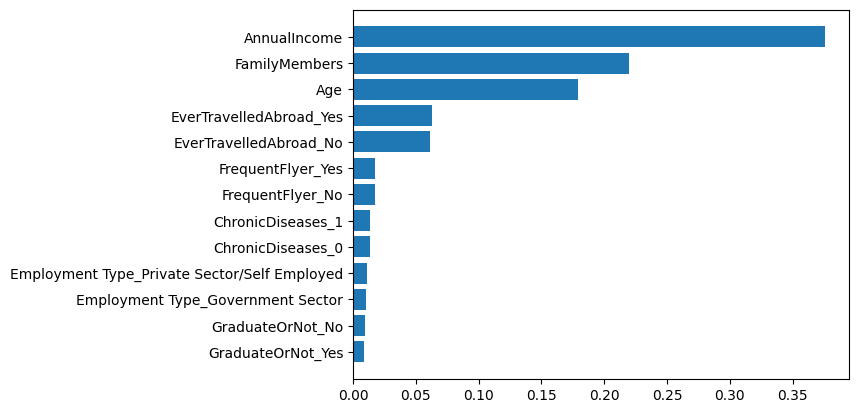

In [33]:
import matplotlib.pyplot as plt
var = list(zip(*features_ranking))

plt.barh(range(len(features_ranking)), var[2], align='center')
plt.yticks(range(len(features_ranking)), var[1])
plt.show()